Name: Georgy Andryushchenko  
Email: g.andryushchenko@innopolis.university  
Group: B19-DS-01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear/Polynomial Regression

## Practical Task 1

In [ ]:
df1 = pd.read_csv('task1_dataset.csv')
# drop redundant column 'unnamed: 0'
df1.drop(df1.columns[0], axis=1, inplace=True)

df1_full = pd.read_csv('task1_dataset_full.csv')
# drop redundant column 'unnamed: 0'
df1_full.drop(df1_full.columns[0], axis=1, inplace=True)

* Preprocess and visualize the dataset

In [ ]:
# Encode datetime column with integer values from 0 to len(dataset)
df1.sort_values('0', axis='index', inplace=True)
df1['dt_encoded'] = np.arange(0,len(df1))
df1.reset_index(drop=True, inplace=True)

# df1_full.sort_values('datetime', axis='index', inplace=True)
df1_full['dt_encoded'] = np.arange(0,len(df1_full))
df1_full.reset_index(drop=True, inplace=True)

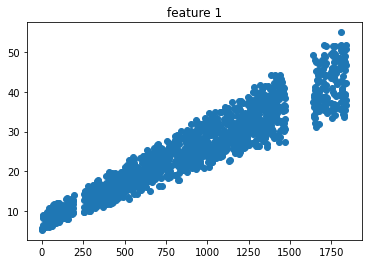

In [ ]:
# Plot all features of the dataset (on separate plots)
plt.title('feature 1')
plt.scatter(df1['dt_encoded'], df1['1'])

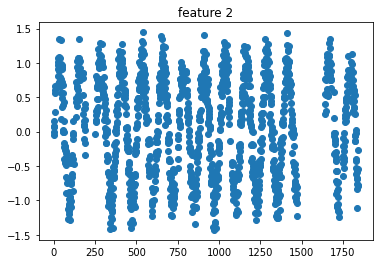

In [ ]:
plt.title('feature 2')
plt.scatter(df1['dt_encoded'], df1['2'])

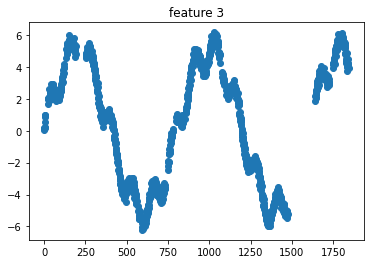

In [ ]:
plt.title('feature 3')
plt.scatter(df1['dt_encoded'], df1['3'])

* Use different regression models with different degrees from this interval [1, 10] to predict missing values
and fill the gaps (provide imputation).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create copies of the dataset to impute 
# for each regressive model (with degrees from 1 to 10)
imp_dfs = [df1.copy() for i in range(10)]

In [ ]:
# function that creates a polynomial regression model
# with the specified degree of polynomial
def train_and_predict(x_train, y_train, x_pred, degree):
    
    # convert the features of the linear regression
    # to the polynomial form
    polynomial_features = PolynomialFeatures(
        degree=degree,
        include_bias=False
    )
    
    # create a linear regression model
    linear_regression = LinearRegression()
    
    # compose a polynomial regression model
    pipeline = Pipeline(
        [("polynomial_features", polynomial_features),
         ("linear_regression", linear_regression)]
    )
    
    # train the model
    pipeline.fit(np.array(x_train)[:, np.newaxis], y_train)
    
    # return the predictions as Series with the index identical
    # to the index of x_pred dataset (necessary for imputation)
    return pd.Series(
        pipeline.predict(np.array(x_pred)[:, np.newaxis]),
        index=x_pred.index
    )

In [ ]:
# function that makes predictions for each degree
def compute_y_preds(x_train, y_train, x_pred):

    y_preds = list()

    for degree in range(1, 11):
        y_preds.append(
            train_and_predict(x_train, y_train, x_pred, degree)
        )

    return y_preds

In [ ]:
# feature 1 imputation

# select the training x and y for the first feature
f1_train_data = df1[df1['1'].notna()] 
f1_x_train = f1_train_data['dt_encoded']
f1_y_train = f1_train_data['1']

# select the x for predications
f1_test_data = df1[df1['1'].isna()]
f1_x_pred = f1_test_data['dt_encoded']

# make predictions
f1_y_preds = compute_y_preds(f1_x_train, f1_y_train, f1_x_pred)

for i in range(10):
    # perfrom imputation
    imp_dfs[i]['1'].fillna(f1_y_preds[i], inplace=True)

In [ ]:
# feature 2 imputation

# select the training x and y for the second feature
f2_train_data = df1[df1['2'].notna()] 
f2_x_train = f2_train_data['dt_encoded']
f2_y_train = f2_train_data['2']

# select the x for predications
f2_test_data = df1[df1['2'].isna()]
f2_x_pred = f2_test_data['dt_encoded']

# make predictions
f2_y_preds = compute_y_preds(f2_x_train, f2_y_train, f2_x_pred)

for i in range(10):
    # perfrom imputation
    imp_dfs[i]['2'].fillna(f2_y_preds[i], inplace=True)

In [ ]:
# feature 3 imputation

# select the training x and y for the second feature
f3_train_data = df1[df1['3'].notna()] 
f3_x_train = f3_train_data['dt_encoded']
f3_y_train = f3_train_data['3']

# select the x for predications
f3_test_data = df1[df1['3'].isna()]
f3_x_pred = f3_test_data['dt_encoded']

# make predictions
f3_y_preds = compute_y_preds(f3_x_train, f3_y_train, f3_x_pred)

for i in range(10):
    # perfrom imputation
    imp_dfs[i]['3'].fillna(f3_y_preds[i], inplace=True)

* Plot change of MSE for each degree for all features. (MSE between imputed dataset and ground truth
one).

In [ ]:
# function that calculates MSE for each model 
def compute_mse_list(y_true, imp_dfs, feature_name):
    
    mse_list = list()

    for i in range(10):
        mse_list.append(mean_squared_error(y_true, imp_dfs[i][feature_name]))

    return mse_list

In [ ]:
# function that suggests the optimal complexity
# based on the minimal MSE
def optimal_complexity(mse_list):
    return mse_list.index(min(mse_list)) + 1

optimal complexity: 5
degree 1: 20.712091245288605
degree 2: 20.76025342607047
degree 3: 20.738356571142518
degree 4: 20.70831961759355
degree 5: 20.70727817702105
degree 6: 20.743161788926795
degree 7: 23.296310705870646
degree 8: 55.36320951527191


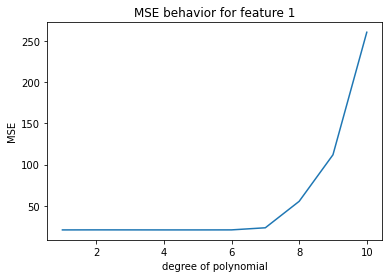

In [ ]:
# MSE calculation for feature 1
f1_y_true = df1_full['feature1']

f1_mse_list = compute_mse_list(f1_y_true, imp_dfs, '1')

plt.title('MSE behavior for feature 1')
plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.plot(range(1,11), f1_mse_list)

print('optimal complexity:', optimal_complexity(f1_mse_list))

for i in range(8):
    print(f'degree {i+1}:', f1_mse_list[i])

optimal complexity: 1
degree 1: 0.24078134531856696
degree 2: 0.2473918911985812
degree 3: 0.2461405789880023
degree 4: 0.24450037529477495
degree 5: 0.24140480915267712
degree 6: 0.2564728907068721


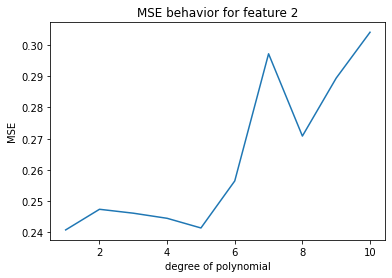

In [ ]:
# MSE calculation for feature 2
f2_y_true = df1_full['feature2']

f2_mse_list = compute_mse_list(f2_y_true, imp_dfs, '2')

plt.title('MSE behavior for feature 2')
plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.plot(range(1,11), f2_mse_list)

print('optimal complexity:', optimal_complexity(f2_mse_list))

for i in range(6):
    print(f'degree {i+1}:', f2_mse_list[i])

optimal complexity: 2
degree 1: 3.1443876280360823
degree 2: 2.5464015592610663
degree 3: 2.6831051895899534
degree 4: 13.635441966593513
degree 5: 75.06590699653871
degree 6: 10.276174561575182
degree 7: 50.21444781526079
degree 8: 3.430109143952226
degree 9: 63.34402270673449


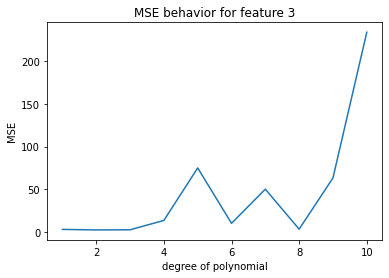

In [ ]:
# MSE calculation for feature 2
f3_y_true = df1_full['feature3']

f3_mse_list = compute_mse_list(f3_y_true, imp_dfs, '3')

plt.title('MSE behavior for feature 3')
plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.plot(range(1,11), f3_mse_list)

print('optimal complexity:', optimal_complexity(f3_mse_list))

for i in range(9):
    print(f'degree {i+1}:', f3_mse_list[i])

* After experiments with regression models, report best regression degree for each feature. Explain this
result: write your ideas on why these degrees best describe particular feature.


Best regression degrees for the following features:


1.   Models with the degrees from 1 to 6 perfrom relatively similar
for the first feature since their corresponding MSE values deviate
from ~20.707 to ~20.76. However, the 5th degree has the minimal MSE.
Thus, it makes sense to choose this degree as the best degree for the
first feature. It happend that the fifth degree describes the noise
of the data well such that the error between the predicted values and
the true ones is minimal. The models with the degrees greater than 6 overfit. Degrees before the 5th underfit.
2. As we can see from the MSE plot for the second feature, the degrees
with MSE close to minimal are 1 and 5. As the best degree for the second feature we might choose
the 1st degrees since it has the minimal MSE. The other degrees overfit.
3. The best degree for the third feature might be the second one due to
the fact that it corresponds to the minimal MSE. The previous one underfits and the following ones overfit.


# Logistic Regression

## Practical Task 2

In [2]:
df2 = pd.read_csv('GermanData.csv', names=range(1, 22), header=None)

categorical_features = [1,3,4,6,7,9,10,12,14,15,17,19,20]
numerical_features = [2,5,8,11,13,16,18]
target_feature = 21

###1. Preprocess and visualize the dataset:

#### Transform all categorical values into numerical values. You are free to apply any ways of handling categorical data and missing values.

In [4]:
# feature encoding
from sklearn.preprocessing import OneHotEncoder

# create one-hot-encoder object
ohe = OneHotEncoder(sparse=False, dtype=int)

# encode categorical features and get numpy arrays
encoding_features = ohe.fit_transform(
    np.array(df2[categorical_features])
)

# remove the categorical features from the datafram
df2.drop(categorical_features, axis=1, inplace=True)
# add the encoded categorical features to the dataset 
df2[ohe.get_feature_names()] = encoding_features

In [5]:
# collect features that are going to be used as predictors
input_features = list(set(df2.columns) - {target_feature})

In [6]:
df2

,2,5,8,11,13,16,18,21,x0_A11,x0_A12,x0_A13,x0_A14,x1_A30,x1_A31,x1_A32,x1_A33,x1_A34,x2_A40,x2_A41,x2_A410,x2_A42,x2_A43,x2_A44,x2_A45,x2_A46,x2_A48,x2_A49,x3_A61,x3_A62,x3_A63,x3_A64,x3_A65,x4_A71,x4_A72,x4_A73,x4_A74,x4_A75,x5_A91,x5_A92,x5_A93,x5_A94,x6_A101,x6_A102,x6_A103,x7_A121,x7_A122,x7_A123,x7_A124,x8_A141,x8_A142,x8_A143,x9_A151,x9_A152,x9_A153,x10_A171,x10_A172,x10_A173,x10_A174,x11_A191,x11_A192,x12_A201,x12_A202
0,6,1169,4,4,67,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
996,30,3857,4,4,40,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0
997,12,804,4,4,38,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
998,45,1845,4,4,23,1,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0


#### Scale features if necessary. Explain why did you decide to scale or not.

To solve the problem, we may use logistic regresssion since we deal with the classification problem. But it should be noticed that it is based on gradient descent. Feature scaling may optimize the process of convergence of the descent and make it faster and stable. The featrues also have outliers, so it makes sense to apply robust scaling on the numerical features (except the target one). Other features don't require scaling.

In [7]:
# features scaling
from sklearn.preprocessing import RobustScaler

# create the object of a robust scaler
robust_scaler = RobustScaler()

# transform the features and update them
df2[numerical_features] = robust_scaler.fit_transform(
    df2[numerical_features]
)

In [8]:
df2

,2,5,8,11,13,16,18,21,x0_A11,x0_A12,x0_A13,x0_A14,x1_A30,x1_A31,x1_A32,x1_A33,x1_A34,x2_A40,x2_A41,x2_A410,x2_A42,x2_A43,x2_A44,x2_A45,x2_A46,x2_A48,x2_A49,x3_A61,x3_A62,x3_A63,x3_A64,x3_A65,x4_A71,x4_A72,x4_A73,x4_A74,x4_A75,x5_A91,x5_A92,x5_A93,x5_A94,x6_A101,x6_A102,x6_A103,x7_A121,x7_A122,x7_A123,x7_A124,x8_A141,x8_A142,x8_A143,x9_A151,x9_A152,x9_A153,x10_A171,x10_A172,x10_A173,x10_A174,x11_A191,x11_A192,x12_A201,x12_A202
0,-1.00,-0.441354,0.5,0.5,2.266667,1.0,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,2.50,1.393114,-0.5,-0.5,-0.733333,0.0,0.0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,-0.50,-0.085739,-0.5,0.0,1.066667,0.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,2.00,2.133883,-0.5,0.5,0.800000,0.0,1.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,0.50,0.978421,0.0,0.5,1.333333,1.0,1.0,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.50,-0.223842,0.0,0.5,-0.133333,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
996,1.00,0.589815,0.5,0.5,0.466667,0.0,0.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0
997,-0.50,-0.581375,0.5,0.5,0.333333,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
998,2.25,-0.182027,0.5,0.5,-0.666667,0.0,0.0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0


#### Visualize the dataset in two dimensions. Dimension reduction methods such as PCA can be used.

In [ ]:
# dimension reduction
from sklearn.decomposition import PCA

# create an object of PCA that reduces
# dimensionality to 2
pca = PCA(n_components=2)

# create a separate dataframe with the reduced dataset
reduced_df2 = pd.DataFrame(pca.fit_transform(df2))

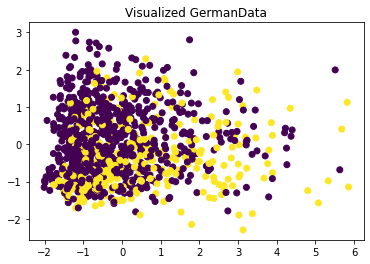

In [ ]:
# visualization
plt.title('Visualized GermanData')
plt.scatter(reduced_df2[0], reduced_df2[1], c=df2[21])

#### Using pandas built-in function, plot the correlation matrix. Answer questions: Are there highly co-related features in the dataset? Is it a problem for regression task?

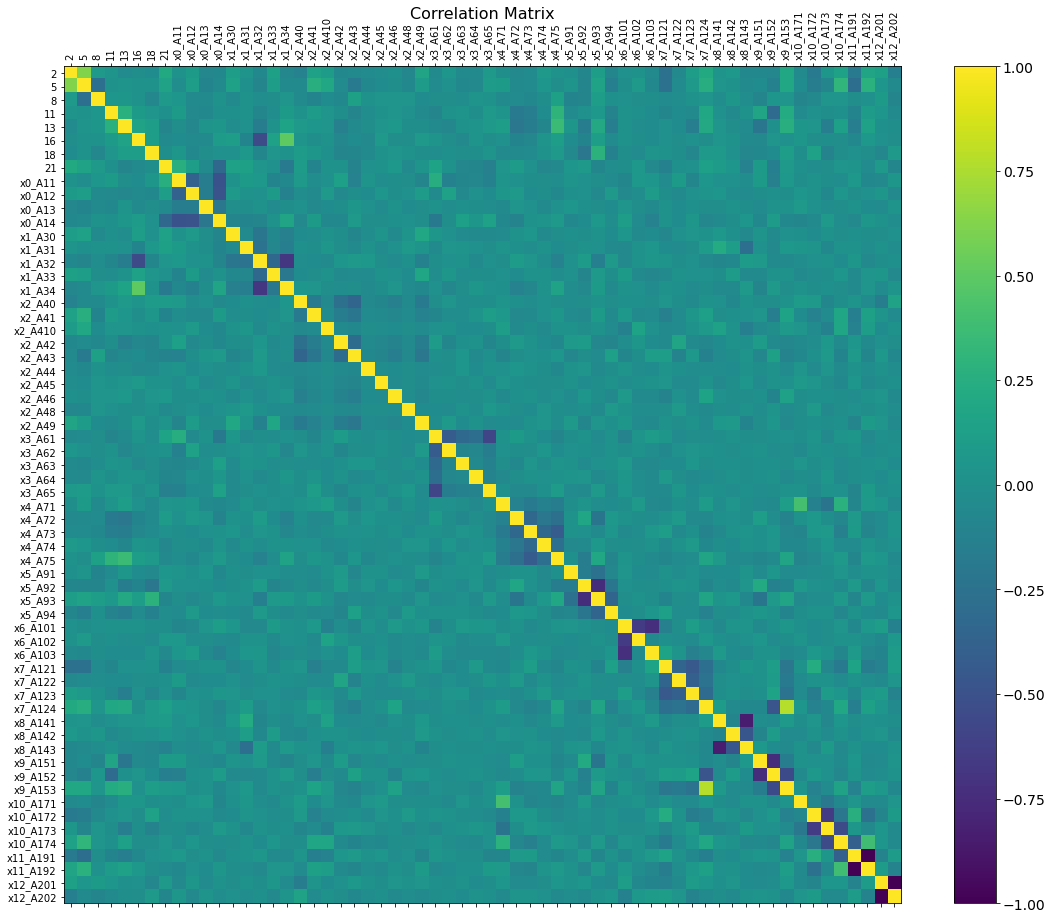

In [12]:
# plotting correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

There are indeed features that correlate in the preprocessed dataset. It can be noticed that the features 2(duration) and 5(amount) tend to correlate. In addition, since we used one-hot-encoding to encode categorical features, the features that contained binary answer have been divided into two separate columns which correlate. It could be a problem for regression since it assumes that the predictors are independent that is uncorrelated. 

###2. Split the dataset into train(70%) and test set(30%)

In [ ]:
# dataset splitting
from sklearn.model_selection import train_test_split

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    df2[input_features], # pass input features (defined at the column transormation stage)
    df2[target_feature], # pass the target feature (column 21)
    test_size=0.3, # 30% of the dataset is for the test 
    random_state=0 # show the same results every time
)

###3. Apply logistic regression using linear and non linear function. Use different polynomial models with different degree (range from 1 to 10) and select the model which performs the best in terms of bias-variance. Highlight which model (degree) underfit and overfit the data. Hint: plot the train and test error for each model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

# function used to predict the values using 
# logistic regression with the specified degree of polynomial
def train_and_predict(x_train, y_train, x_pred, degree):
    
    # pass to the polynomial features the non-encoded
    # numerical features (don't raise encoded features to the power)
    polynomial_features = ColumnTransformer(transformers=[
        ('numerical', PolynomialFeatures(degree=degree), numerical_features),
        ], remainder='passthrough')

    # create logistic regression model
    logistic_regression = LogisticRegression()
    
    # compose logistic regression with the polinomial features
    pipeline = Pipeline(
        [("polynomial_features", polynomial_features),
         ("logistic_regression", logistic_regression)]
    )
    
    pipeline.fit(x_train, y_train)
    
    # predict probability to compute log-loss
    return pipeline.predict_proba(x_pred)

In [ ]:
# function used to compute predictions
# for different polynomial degrees
def compute_y_preds(x_train, y_train, x_pred):

    y_preds = list()

    for degree in range(1, 11):
        y_preds.append(
            train_and_predict(x_train, y_train, x_pred, degree)
        )

    return y_preds

In [ ]:
from sklearn.metrics import log_loss

# function used to compute the log-loss
# for different degrees
def compute_error_list(y_true, y_preds):
    
    error_list = list()

    for y_pred in y_preds:
        error_list.append(log_loss(y_true, y_pred))

    return error_list

In [ ]:
# compute predictions for the test dataset
y_preds_test = compute_y_preds(x_train, y_train, x_test)
# compute predictions for the train dataset
y_preds_train = compute_y_preds(x_train, y_train, x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# compute log-loss for the test dataset
error_list_test = compute_error_list(y_test, y_preds_test)
# compute log-loss for the train dataset
error_list_train = compute_error_list(y_train, y_preds_train)

Optimal Complexity: 1


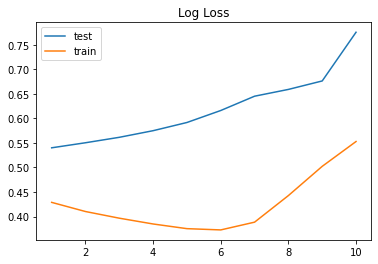

In [ ]:
# plot log loss
plt.title('Log Loss')
plt.plot(range(1,11), error_list_test, label='test')
plt.plot(range(1,11), error_list_train, label='train')
plt.legend()
print('Optimal Complexity:', np.argmin(error_list_test)+1)

As we may see from the plot the minimal test error is reached when the model uses the first degree. The test and the train errors are close to each other. It happens that there are no models that underfit since the first degree is optimal. All the other degrees have greater error and overfit. Thus, we can say that the first degree performs best in terms of bias-variance 

###4. Now that you have the best degree for your model, you will make it even better by fine-tuning its hyperparameters. Use GridSearchCV to find the best hyperparameters. Try different variations with penalty [’l1’, ’l2’], type of solver: [’liblinear’, ’lbfgs’], and regularization strength: np.logspace(4, 4, 20).

In [ ]:
from sklearn.model_selection import GridSearchCV

# grid of parameters to try
tuned_parameters = [
    {
        'penalty': ['l1', 'l2'], 
        'solver': ["liblinear", 'lbfgs'],
        'C': np.logspace(-4,4,20)
    }
]

# create GridSearch object 
# with linear logistic regression
# with log-loss scoring
clf = GridSearchCV(
    LogisticRegression(),
    tuned_parameters,
    scoring='neg_log_loss'
)

clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-04...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [ ]:
# print out the best parameters
print(clf.best_params_)

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'lbfgs'}


###5. Using your best model, compare the accuracy of predictions across male and female applicants e.i, split the test set into two groups (Male and female) compute the accuracy on each groups using the test set, plot and compare them. What conclusion can you draw and what could be the source of your observation?

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    df2[input_features],
    df2[target_feature], 
    test_size=0.3,
    random_state=0
)

# compose conditions arrays for men and women
# to check class representation
male_condition = (x_train['x5_A91'] == 1) | (x_train['x5_A93'] == 1) | (x_train['x5_A94'] == 1) 
female_condition = x_train['x5_A92'] == 1

# check class representation
print('# of men in the training dataset:', len(x_train[male_condition]))
print('# of women in the training dataset:', len(x_train[female_condition]))

# of men in the training dataset: 494
# of women in the training dataset: 206


In [ ]:
from sklearn.linear_model import LogisticRegression

# create a model with the best parameters
model = LogisticRegression(penalty='l2', solver='lbfgs', C=0.23357214690901212)

# train the model
model.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# compose conditions arrays for men and women
# to divide the test dataset
male_condition = (x_test['x5_A91'] == 1) | (x_test['x5_A93'] == 1) | (x_test['x5_A94'] == 1) 
female_condition = x_test['x5_A92'] == 1

x_test_m = x_test[male_condition]
x_test_w = x_test[female_condition]

y_test_m = y_test[male_condition]
y_test_w = y_test[female_condition]

In [ ]:
from sklearn.metrics import accuracy_score

# get the accuracy
gender_accuracy_df = pd.DataFrame({
    'female': [accuracy_score(y_test_w, model.predict(x_test_w))],
    'male': [accuracy_score(y_test_m, model.predict(x_test_m))]
})

     female      male
0  0.692308  0.790816


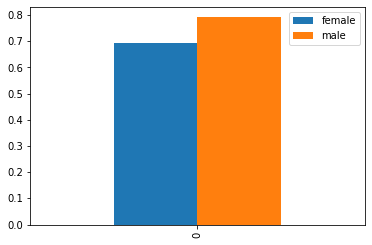

In [ ]:
print(gender_accuracy_df)
gender_accuracy_df.plot(kind='bar')

As it may be seen, the model predicts male samples better than the female samples. It imples that the model is going to be biased when making the decision for a woman and misclassify the person. This happens due to the fact that the model was trained on the dataset that contains more male samples than female ones.   